In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
from sklearn.cluster import KMeans
from collections import Counter
from pandas import read_excel

In [9]:
loan_train = pd.read_excel('C:/Users/hp/Desktop/Analytics/MSBA/BANA 273 - Machine Learning Analytics/Project/Loan-Train - Data Cleanup.xlsx', sheet_name='Sheet1')
#loan_train = pd.read_csv('C:/Users/hp/Desktop/Analytics/MSBA/BANA 273 - Machine Learning Analytics/Project/Loan-Train - Data Cleanup.xlsx')
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Credibility
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,N
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,N
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,N
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,N
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,N
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,N
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,N


In [4]:
loan_train.shape

(614, 14)

In [10]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Credibility        614 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 67.3+ KB


In [11]:
categorical_columns = ['Credit_History']
for col in categorical_columns:
    loan_train[col].fillna(loan_train[col].mode()[0],inplace=True)

#This didn't work.Above piece worked
#loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode(), inplace=True) # Mode

In [12]:
loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean(), inplace=True) # Mean
#loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].mean(), inplace=True) # Mean

In [13]:
loan_train['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [23]:
loan_train.Loan_Status = loan_train.Loan_Status.replace({"Y": 1, "N" : 0})
# loan_test.Loan_Status = loan_test.Loan_Status.replace({"Y": 1, "N" : 0}) 

loan_train.Gender = loan_train.Gender.replace({"Male": 1, "Female" : 0})
#loan_test.Gender = loan_test.Gender.replace({"Male": 1, "Female" : 0})

loan_train.Married = loan_train.Married.replace({"Yes": 1, "No" : 0})
#loan_test.Married = loan_test.Married.replace({"Yes": 1, "No" : 0})

loan_train.Self_Employed = loan_train.Self_Employed.replace({"Yes": 1, "No" : 0})
#loan_test.Self_Employed = loan_test.Self_Employed.replace({"Yes": 1, "No" : 0})

loan_train.Credibility = loan_train.Credibility.replace({"Y": 1, "N" : 0})
#loan_test.Self_Employed = loan_test.Self_Employed.replace({"Yes": 1, "No" : 0})

In [15]:
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
#loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace=True)

loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
#loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0], inplace=True)

loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
#loan_test['Married'].fillna(loan_test['Married'].mode()[0], inplace=True)

#loan_train['Credit_History'].fillna(loan_train['Credit_History'].mean(), inplace=True)
#loan_test['Credit_History'].fillna(loan_test['Credit_History'].mean(), inplace=True)

In [18]:
loan_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Credibility          0
dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    loan_train[col] = le.fit_transform(loan_train[col])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']

In [17]:
loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0], inplace=True)
loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mode()[0], inplace=True)

In [25]:
loan_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Credibility          0
dtype: int64

In [29]:
loan_train_columns = loan_train.columns

def explore_object_type(df ,feature_name):   
        print(df[feature_name].value_counts())
        
for featureName in loan_train_columns:
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(loan_train, str(featureName))


"Loan_ID's" Values with count are :
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

"Gender's" Values with count are :
1.0    502
0.0    112
Name: Gender, dtype: int64

"Married's" Values with count are :
1.0    401
0.0    213
Name: Married, dtype: int64

"Dependents's" Values with count are :
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

"Education's" Values with count are :
0    480
1    134
Name: Education, dtype: int64

"Self_Employed's" Values with count are :
0.0    532
1.0     82
Name: Self_Employed, dtype: int64

"ApplicantIncome's" Values with count are :
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

"CoapplicantIncome's" Values with count are :
0.0       273
2500.0      5
2083.0      5
1666.0

In [31]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Credibility
0,LP001002,1.0,0.0,0,0,0.0,5849,0.0,146.412162,360.0,1.0,2,1,0
1,LP001003,1.0,1.0,1,0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0,1
2,LP001005,1.0,1.0,0,0,1.0,3000,0.0,66.000000,360.0,1.0,2,1,0
3,LP001006,1.0,1.0,0,1,0.0,2583,2358.0,120.000000,360.0,1.0,2,1,0
4,LP001008,1.0,0.0,0,0,0.0,6000,0.0,141.000000,360.0,1.0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,0,0.0,2900,0.0,71.000000,360.0,1.0,0,1,0
610,LP002979,1.0,1.0,3+,0,0.0,4106,0.0,40.000000,180.0,1.0,0,1,0
611,LP002983,1.0,1.0,1,0,0.0,8072,240.0,253.000000,360.0,1.0,2,1,0
612,LP002984,1.0,1.0,2,0,0.0,7583,0.0,187.000000,360.0,1.0,2,1,0


In [47]:
pd.crosstab(loan_train['Loan_Status'], loan_train['Gender'], margins=True, margins_name="Total")

Gender,0.0,1.0,Total
Loan_Status,,,
0,37,155,192
1,75,347,422
Total,112,502,614


In [48]:
pd.crosstab(loan_train['Loan_Status'], loan_train['Married'], margins=True, margins_name="Total")

Married,0.0,1.0,Total
Loan_Status,,,
0,79,113,192
1,134,288,422
Total,213,401,614


In [49]:
pd.crosstab(loan_train['Loan_Status'], loan_train['Dependents'], margins=True, margins_name="Total")

Dependents,0,1,2,3+,Total
Loan_Status,,,,,
0,113,36,25,18,192
1,247,66,76,33,422
Total,360,102,101,51,614


In [51]:
pd.crosstab(loan_train['Loan_Status'], loan_train['Education'], margins=True, margins_name="Total")

Education,0,1,Total
Loan_Status,,,
0,140,52,192
1,340,82,422
Total,480,134,614


In [50]:
pd.crosstab(loan_train['Loan_Status'], loan_train['Self_Employed'], margins=True, margins_name="Total")

Self_Employed,0.0,1.0,Total
Loan_Status,,,
0,166,26,192
1,366,56,422
Total,532,82,614


In [52]:
pd.crosstab(loan_train['Loan_Status'], loan_train['Credit_History'], margins=True, margins_name="Total")

Credit_History,0.0,1.0,Total
Loan_Status,,,
0,82,110,192
1,7,415,422
Total,89,525,614


In [53]:
pd.crosstab(loan_train['Loan_Status'], loan_train['Property_Area'], margins=True, margins_name="Total")

Property_Area,0,1,2,Total
Loan_Status,,,,
0,69,54,69,192
1,110,179,133,422
Total,179,233,202,614


AttributeError: 'AxesSubplot' object has no attribute 'show'

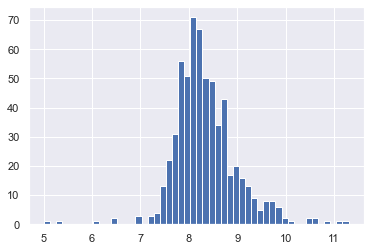

In [57]:
loan_train['ApplicantIncome_log']=np.log(loan_train['ApplicantIncome'])  
x = loan_train['ApplicantIncome_log'].hist(bins=50)
x.show()